<a href="https://colab.research.google.com/github/zunayed-islam/Mysite/blob/main/zunayed_try04_Mushroom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Library**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


from sklearn.ensemble import RandomForestClassifier

Import Dataset


In [7]:
data = pd.read_csv("/content/Mushroom/agaricus-lepiota.data")


Data


In [8]:
data

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [10]:
print(data.head())

   p  x  s  n  t p.1  f  c n.1  k  ... s.2  w w.1 p.2 w.2  o p.3 k.1 s.3  u
0  e  x  s  y  t   a  f  c   b  k  ...   s  w   w   p   w  o   p   n   n  g
1  e  b  s  w  t   l  f  c   b  n  ...   s  w   w   p   w  o   p   n   n  m
2  p  x  y  w  t   p  f  c   n  n  ...   s  w   w   p   w  o   p   k   s  u
3  e  x  s  g  f   n  f  w   b  k  ...   s  w   w   p   w  o   e   n   a  g
4  e  x  y  y  t   a  f  c   b  n  ...   s  w   w   p   w  o   p   k   n  g

[5 rows x 23 columns]


In [11]:
data.columns

Index(['p', 'x', 's', 'n', 't', 'p.1', 'f', 'c', 'n.1', 'k', 'e', 'e.1', 's.1',
       's.2', 'w', 'w.1', 'p.2', 'w.2', 'o', 'p.3', 'k.1', 's.3', 'u'],
      dtype='object')

**Preprocessing**

In [12]:
# Check for null elements before removing
null_elements_before = data.isnull().sum().sum()
print("Number of null elements before:", null_elements_before)

Number of null elements before: 0


In [13]:
mappings = list()

encoder = LabelEncoder()

for column in range(len(data.columns)):
    data[data.columns[column]] = encoder.fit_transform(data[data.columns[column]])
    mappings_dict = {index: label for index, label in enumerate(encoder.classes_)}
    mappings.append(mappings_dict)

In [14]:
mappings

[{0: 'e', 1: 'p'},
 {0: 'b', 1: 'c', 2: 'f', 3: 'k', 4: 's', 5: 'x'},
 {0: 'f', 1: 'g', 2: 's', 3: 'y'},
 {0: 'b',
  1: 'c',
  2: 'e',
  3: 'g',
  4: 'n',
  5: 'p',
  6: 'r',
  7: 'u',
  8: 'w',
  9: 'y'},
 {0: 'f', 1: 't'},
 {0: 'a', 1: 'c', 2: 'f', 3: 'l', 4: 'm', 5: 'n', 6: 'p', 7: 's', 8: 'y'},
 {0: 'a', 1: 'f'},
 {0: 'c', 1: 'w'},
 {0: 'b', 1: 'n'},
 {0: 'b',
  1: 'e',
  2: 'g',
  3: 'h',
  4: 'k',
  5: 'n',
  6: 'o',
  7: 'p',
  8: 'r',
  9: 'u',
  10: 'w',
  11: 'y'},
 {0: 'e', 1: 't'},
 {0: '?', 1: 'b', 2: 'c', 3: 'e', 4: 'r'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'p'},
 {0: 'n', 1: 'o', 2: 'w', 3: 'y'},
 {0: 'n', 1: 'o', 2: 't'},
 {0: 'e', 1: 'f', 2: 'l', 3: 'n', 4: 'p'},
 {0: 'b', 1: 'h', 2: 'k', 3: 'n', 4: 'o', 5: 'r', 6: 'u', 7: 'w', 8: 'y'},
 {0: 'a', 1: 'c', 2: 'n', 3: 's', 4: 'v', 5: 'y

In [15]:
y = data['p']
X = data.drop('p', axis=1)

In [16]:
X

,x,s,n,t,p.1,f,c,n.1,k,e,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
1,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
2,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
3,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
4,5,3,9,1,0,1,0,0,5,0,...,2,7,7,0,2,1,4,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8119,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8120,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8121,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [17]:
y

0       0
1       0
2       1
3       0
4       0
       ..
8118    0
8119    0
8120    0
8121    1
8122    0
Name: p, Length: 8123, dtype: int64

In [18]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [19]:
X

,x,s,n,t,p.1,f,c,n.1,k,e,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,1.029843,0.140137,1.765745,1.186092,-1.970181,0.162907,-0.438896,-0.668905,-0.229013,-1.144969,...,0.586433,0.622495,0.632046,0.0,0.142046,-0.256149,0.948192,-0.250545,-1.313112,-0.295537
1,-2.086928,0.140137,1.372944,1.186092,-0.544073,0.162907,-0.438896,-0.668905,0.053446,-1.144969,...,0.586433,0.622495,0.632046,0.0,0.142046,-0.256149,0.948192,-0.250545,-1.313112,0.867566
2,1.029843,0.953230,1.372944,1.186092,0.882034,0.162907,-0.438896,1.494980,0.053446,-1.144969,...,0.586433,0.622495,0.632046,0.0,0.142046,-0.256149,0.948192,-0.670255,-0.514429,2.030668
3,1.029843,0.140137,-0.591064,-0.843105,0.406665,0.162907,2.278445,-0.668905,-0.229013,0.873386,...,0.586433,0.622495,0.632046,0.0,0.142046,-0.256149,-1.272091,-0.250545,-2.910478,-0.295537
4,1.029843,0.953230,1.765745,1.186092,-1.970181,0.162907,-0.438896,-0.668905,0.053446,-1.144969,...,0.586433,0.622495,0.632046,0.0,0.142046,-0.256149,0.948192,-0.670255,-1.313112,-0.295537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,-0.216866,0.140137,-0.198263,-0.843105,0.406665,-6.138481,-0.438896,-0.668905,1.748194,-1.144969,...,0.586433,-0.429195,-0.416587,0.0,-3.978797,-0.256149,0.948192,-1.509675,-2.111795,0.286015
8119,1.029843,0.140137,-0.198263,-0.843105,0.406665,-6.138481,-0.438896,-0.668905,1.748194,-1.144969,...,0.586433,-0.429195,-0.416587,0.0,-8.099640,-0.256149,0.948192,-1.509675,0.284254,0.286015
8120,-0.840220,0.140137,-0.198263,-0.843105,0.406665,-6.138481,-0.438896,-0.668905,0.053446,-1.144969,...,0.586433,-0.429195,-0.416587,0.0,-3.978797,-0.256149,0.948192,-1.509675,-2.111795,0.286015
8121,-0.216866,0.953230,-0.198263,-0.843105,1.832772,0.162907,-0.438896,1.494980,-1.358845,0.873386,...,-0.892945,0.622495,0.632046,0.0,0.142046,-0.256149,-1.272091,1.428295,0.284254,0.286015


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

**Model Selection**

In [21]:
log_model = LogisticRegression()
svm_model = SVC(C=1.0, kernel='rbf')
nn_model = MLPClassifier(hidden_layer_sizes=(128, 128))
rf_model= RandomForestClassifier()

**Training**


In [22]:
np.sum(y) / len(y)

0.48196479133325126

In [23]:
log_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
nn_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
print(f"---Logistic Regression: {log_model.score(X_test, y_test)}")
print(f"Support Vector Machine: {svm_model.score(X_test, y_test)}")
print(f"--------Neural Network: {nn_model.score(X_test, y_test)}")
print(f"---------Random Forest: {rf_model.score(X_test, y_test)}")

---Logistic Regression: 0.9606153846153846
Support Vector Machine: 1.0
--------Neural Network: 1.0
---------Random Forest: 1.0


In [28]:
X_test.shape

(1625, 22)

<Axes: >

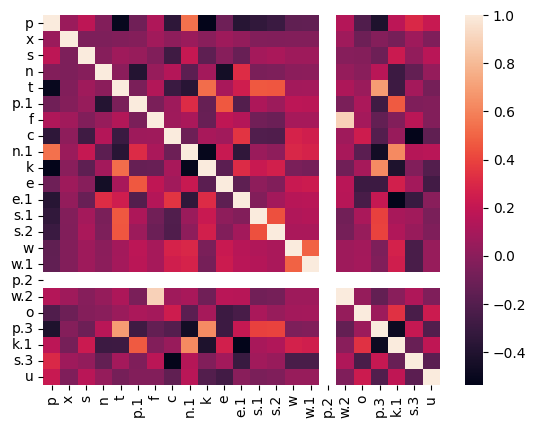

In [29]:
corr = data.corr()
sns.heatmap(corr)

In [33]:

from sklearn.metrics import accuracy_score, log_loss


# Make predictions on both train and test sets
y_pred_train = log_model.predict(X_train)
y_pred_test = log_model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Calculate log loss
train_loss = log_loss(y_train, y_pred_train)
test_loss = log_loss(y_test, y_pred_test)

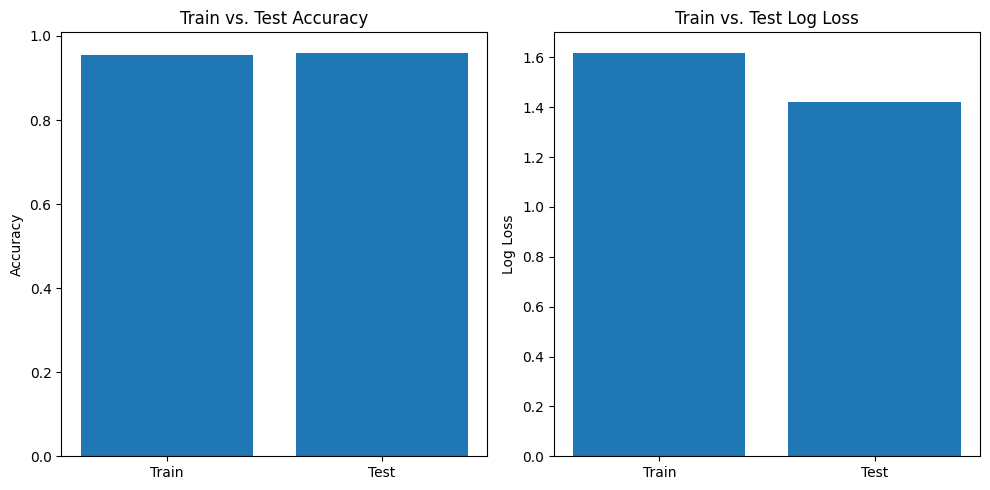

In [34]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Bar plot for accuracy
axs[0].bar(["Train", "Test"], [train_accuracy, test_accuracy])
axs[0].set_ylabel("Accuracy")
axs[0].set_title("Train vs. Test Accuracy")

# Bar plot for log loss
axs[1].bar(["Train", "Test"], [train_loss, test_loss])
axs[1].set_ylabel("Log Loss")
axs[1].set_title("Train vs. Test Log Loss")

plt.tight_layout()
plt.show()

---Logistic Regression (Validation): 0.9452307692307691
Support Vector Machine (Validation): 0.9969230769230769
--------Neural Network (Validation): 0.9981538461538462
---Logistic Regression (Test): 0.9636923076923077
Support Vector Machine (Test): 1.0
--------Neural Network (Test): 1.0


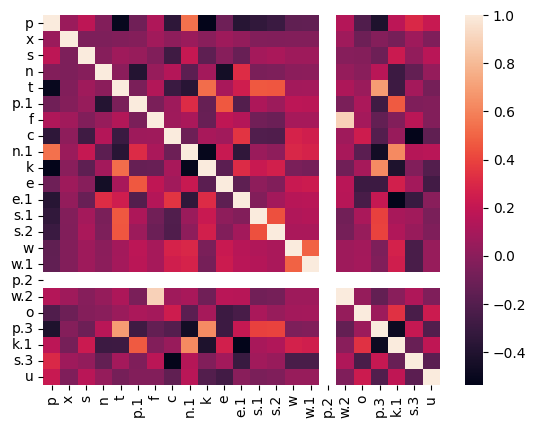

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Load the dataset
data = pd.read_csv("/content/Mushroom/agaricus-lepiota.data")

# Preprocessing
mappings = list()
encoder = LabelEncoder()

for column in range(len(data.columns)):
    data[data.columns[column]] = encoder.fit_transform(data[data.columns[column]])
    mappings_dict = {index: label for index, label in enumerate(encoder.classes_)}
    mappings.append(mappings_dict)

y = data['p']
X = data.drop('p', axis=1)

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Model Selection
log_model = LogisticRegression()
svm_model = SVC(C=1.0, kernel='rbf')
nn_model = MLPClassifier(hidden_layer_sizes=(128, 128))

# Training
log_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
nn_model.fit(X_train, y_train)

# Cross-validation
log_cv_score = cross_val_score(log_model, X_val, y_val, cv=5).mean()
svm_cv_score = cross_val_score(svm_model, X_val, y_val, cv=5).mean()
nn_cv_score = cross_val_score(nn_model, X_val, y_val, cv=5).mean()

print(f"---Logistic Regression (Validation): {log_cv_score}")
print(f"Support Vector Machine (Validation): {svm_cv_score}")
print(f"--------Neural Network (Validation): {nn_cv_score}")

# Testing
log_test_score = log_model.score(X_test, y_test)
svm_test_score = svm_model.score(X_test, y_test)
nn_test_score = nn_model.score(X_test, y_test)

print(f"---Logistic Regression (Test): {log_test_score}")
print(f"Support Vector Machine (Test): {svm_test_score}")
print(f"--------Neural Network (Test): {nn_test_score}")

# Visualization (e.g., heatmap)
X_test.shape
corr = data.corr()
sns.heatmap(corr)
plt.show()
